## ENDER implementation runtime testing
### Test done on the endometriosis dataset

6 versions:
- basic Python (Base)
- compiled basic Python (-)
- modified for Cython (Modified)
- modified for Cython with parallelism (ModifiedPara)
- cythonized and using the lower bound (BoundedFast)
- cythonized and using the lower bound and parallelism (BoundedFastPara)

Every version also tested in 2 variants, either using just the gradient, or the gradient and the hessian to calculate the risk

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/put-msc/Endometriosis/endometriosis.csv")
X = df.drop(columns=['target'])
y = df['target'].astype('int')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=42, stratify=y)

In [2]:
from EnderClassifierBase import EnderClassifier as ECBase
from EnderClassifier import EnderClassifier as EC
from EnderClassifierModified import EnderClassifier as ECM
from EnderClassifierModifiedPara import EnderClassifier as ECMP
from EnderClassifierBoundedFast import EnderClassifier as ECBF
from EnderClassifierBoundedFastPara import EnderClassifier as ECBFP

print(X_train.shape, y_train.shape)
N_RULES = 50

(870, 85) (870,)


The test is to see how long it takes to train 50 rules on the same data.

In [3]:
ecbaseTrue = ECBase(verbose=False, n_rules=N_RULES, use_gradient=True)
ecbaseTrueTimes, ecbaseTrueTotalTimes = ecbaseTrue.fit(X_train, y_train)

Default rule creation time: 0.00149 seconds
Rule 1 creation time: 1.11436 seconds, total: 1.11436 seconds
Rule 2 creation time: 0.92221 seconds, total: 2.03682 seconds
Rule 3 creation time: 0.94034 seconds, total: 2.97740 seconds
Rule 4 creation time: 0.65968 seconds, total: 3.63734 seconds
Rule 5 creation time: 0.84271 seconds, total: 4.48017 seconds
Rule 6 creation time: 0.79076 seconds, total: 5.27118 seconds
Rule 7 creation time: 1.06568 seconds, total: 6.33711 seconds
Rule 8 creation time: 0.90974 seconds, total: 7.24696 seconds
Rule 9 creation time: 0.70725 seconds, total: 7.95451 seconds
Rule 10 creation time: 1.47329 seconds, total: 9.42804 seconds
Rule 11 creation time: 1.23159 seconds, total: 10.65976 seconds
Rule 12 creation time: 1.18272 seconds, total: 11.84273 seconds
Rule 13 creation time: 1.07552 seconds, total: 12.91850 seconds
Rule 14 creation time: 0.98269 seconds, total: 13.90133 seconds
Rule 15 creation time: 0.70615 seconds, total: 14.60774 seconds
Rule 16 creatio

In [4]:
ecbaseFalse = ECBase(verbose=False, n_rules=N_RULES, use_gradient=False)
ecbaseFalseTimes, ecbaseFalseTotalTimes = ecbaseFalse.fit(X_train, y_train)

Default rule creation time: 0.00134 seconds
Rule 1 creation time: 0.62638 seconds, total: 0.62638 seconds
Rule 2 creation time: 0.59266 seconds, total: 1.21916 seconds
Rule 3 creation time: 0.77500 seconds, total: 1.99446 seconds
Rule 4 creation time: 0.58933 seconds, total: 2.58411 seconds
Rule 5 creation time: 0.43609 seconds, total: 3.02048 seconds
Rule 6 creation time: 0.23319 seconds, total: 3.25391 seconds
Rule 7 creation time: 0.47164 seconds, total: 3.72563 seconds
Rule 8 creation time: 0.39078 seconds, total: 4.11664 seconds
Rule 9 creation time: 0.42431 seconds, total: 4.54119 seconds
Rule 10 creation time: 0.26548 seconds, total: 4.80691 seconds
Rule 11 creation time: 0.29481 seconds, total: 5.10190 seconds
Rule 12 creation time: 0.26595 seconds, total: 5.36795 seconds
Rule 13 creation time: 0.40199 seconds, total: 5.77003 seconds
Rule 14 creation time: 0.38088 seconds, total: 6.15114 seconds
Rule 15 creation time: 0.64753 seconds, total: 6.79889 seconds
Rule 16 creation tim

In [5]:
ecTrue = EC(verbose = False, n_rules=N_RULES, use_gradient=True)
ecTrueTimes, ecTrueTotalTimes = ecTrue.fit(X_train, y_train)

Default rule creation time: 0.00082 seconds
Rule 1 creation time: 1.17718 seconds, total: 1.17718 seconds
Rule 2 creation time: 0.96184 seconds, total: 2.13926 seconds
Rule 3 creation time: 1.01289 seconds, total: 3.15226 seconds
Rule 4 creation time: 0.63403 seconds, total: 3.78652 seconds
Rule 5 creation time: 0.88040 seconds, total: 4.66715 seconds
Rule 6 creation time: 0.78932 seconds, total: 5.45660 seconds
Rule 7 creation time: 1.11870 seconds, total: 6.57540 seconds
Rule 8 creation time: 0.88851 seconds, total: 7.46416 seconds
Rule 9 creation time: 0.72497 seconds, total: 8.18939 seconds
Rule 10 creation time: 1.49128 seconds, total: 9.68091 seconds
Rule 11 creation time: 1.31133 seconds, total: 10.99252 seconds
Rule 12 creation time: 1.25898 seconds, total: 12.25161 seconds
Rule 13 creation time: 1.19043 seconds, total: 13.44235 seconds
Rule 14 creation time: 1.01028 seconds, total: 14.45292 seconds
Rule 15 creation time: 0.74098 seconds, total: 15.19401 seconds
Rule 16 creatio

In [6]:
ecFalse = EC(verbose=False, n_rules=N_RULES, use_gradient=False)
ecFalseTimes, ecFalseTotalTimes = ecFalse.fit(X_train, y_train)

Default rule creation time: 0.00077 seconds
Rule 1 creation time: 0.67195 seconds, total: 0.67195 seconds
Rule 2 creation time: 0.59155 seconds, total: 1.26376 seconds
Rule 3 creation time: 0.82940 seconds, total: 2.09337 seconds
Rule 4 creation time: 0.63409 seconds, total: 2.72775 seconds
Rule 5 creation time: 0.43179 seconds, total: 3.15978 seconds
Rule 6 creation time: 0.24544 seconds, total: 3.40537 seconds
Rule 7 creation time: 0.45618 seconds, total: 3.86160 seconds
Rule 8 creation time: 0.39680 seconds, total: 4.25876 seconds
Rule 9 creation time: 0.40821 seconds, total: 4.66710 seconds
Rule 10 creation time: 0.27090 seconds, total: 4.93834 seconds
Rule 11 creation time: 0.27275 seconds, total: 5.21115 seconds
Rule 12 creation time: 0.27717 seconds, total: 5.48837 seconds
Rule 13 creation time: 0.39718 seconds, total: 5.88567 seconds
Rule 14 creation time: 0.40619 seconds, total: 6.29208 seconds
Rule 15 creation time: 0.65463 seconds, total: 6.94683 seconds
Rule 16 creation tim

In [16]:
ecmTrue = ECM(verbose=False, n_rules=N_RULES, use_gradient=True)
ecmTrueTimes, ecmTrueTotalTimes = ecmTrue.fit(X_train, y_train)

Default rule creation time: 0.00243 seconds
Rule 1 creation time: 0.02003 seconds, total: 0.02003 seconds
Rule 2 creation time: 0.02109 seconds, total: 0.04115 seconds
Rule 3 creation time: 0.01452 seconds, total: 0.05570 seconds
Rule 4 creation time: 0.01304 seconds, total: 0.06878 seconds
Rule 5 creation time: 0.01868 seconds, total: 0.08749 seconds
Rule 6 creation time: 0.01671 seconds, total: 0.10423 seconds
Rule 7 creation time: 0.02038 seconds, total: 0.12463 seconds
Rule 8 creation time: 0.01857 seconds, total: 0.14324 seconds
Rule 9 creation time: 0.01465 seconds, total: 0.15794 seconds
Rule 10 creation time: 0.03250 seconds, total: 0.19049 seconds
Rule 11 creation time: 0.02186 seconds, total: 0.21239 seconds
Rule 12 creation time: 0.02559 seconds, total: 0.23801 seconds
Rule 13 creation time: 0.01885 seconds, total: 0.25695 seconds
Rule 14 creation time: 0.02022 seconds, total: 0.27733 seconds
Rule 15 creation time: 0.01675 seconds, total: 0.29411 seconds
Rule 16 creation tim

In [17]:
ecmFalse = ECM(verbose=False, n_rules=N_RULES, use_gradient=False)
ecmFalseTimes, ecmFalseTotalTimes = ecmFalse.fit(X_train, y_train)

Default rule creation time: 0.00233 seconds
Rule 1 creation time: 0.01342 seconds, total: 0.01342 seconds
Rule 2 creation time: 0.01042 seconds, total: 0.02387 seconds
Rule 3 creation time: 0.01471 seconds, total: 0.03861 seconds
Rule 4 creation time: 0.01082 seconds, total: 0.04945 seconds
Rule 5 creation time: 0.00768 seconds, total: 0.05716 seconds
Rule 6 creation time: 0.00514 seconds, total: 0.06232 seconds
Rule 7 creation time: 0.00858 seconds, total: 0.07092 seconds
Rule 8 creation time: 0.00741 seconds, total: 0.07835 seconds
Rule 9 creation time: 0.00764 seconds, total: 0.08601 seconds
Rule 10 creation time: 0.00551 seconds, total: 0.09155 seconds
Rule 11 creation time: 0.00519 seconds, total: 0.09676 seconds
Rule 12 creation time: 0.00589 seconds, total: 0.10266 seconds
Rule 13 creation time: 0.00800 seconds, total: 0.11074 seconds
Rule 14 creation time: 0.00845 seconds, total: 0.11921 seconds
Rule 15 creation time: 0.01149 seconds, total: 0.13072 seconds
Rule 16 creation tim

In [18]:
ecmpTrue = ECMP(verbose=False, n_rules=N_RULES, use_gradient=True)
ecmpTrueTimes, ecmpTrueTotalTimes = ecmpTrue.fit(X_train, y_train)

Default rule creation time: 0.00288 seconds
Rule 1 creation time: 0.01209 seconds, total: 0.01210 seconds
Rule 2 creation time: 0.01253 seconds, total: 0.02466 seconds
Rule 3 creation time: 0.01176 seconds, total: 0.03645 seconds
Rule 4 creation time: 0.00955 seconds, total: 0.04604 seconds
Rule 5 creation time: 0.01077 seconds, total: 0.05684 seconds
Rule 6 creation time: 0.01248 seconds, total: 0.06935 seconds
Rule 7 creation time: 0.01153 seconds, total: 0.08090 seconds
Rule 8 creation time: 0.01196 seconds, total: 0.09289 seconds
Rule 9 creation time: 0.01071 seconds, total: 0.10362 seconds
Rule 10 creation time: 0.01780 seconds, total: 0.12158 seconds
Rule 11 creation time: 0.01393 seconds, total: 0.13555 seconds
Rule 12 creation time: 0.01525 seconds, total: 0.15083 seconds
Rule 13 creation time: 0.01274 seconds, total: 0.16360 seconds
Rule 14 creation time: 0.01366 seconds, total: 0.17729 seconds
Rule 15 creation time: 0.01056 seconds, total: 0.18789 seconds
Rule 16 creation tim

In [19]:
ecmpFalse = ECMP(verbose=False, n_rules=N_RULES, use_gradient=False)
ecmpFalseTimes, ecmpFalseTotalTimes = ecmpFalse.fit(X_train, y_train)

Default rule creation time: 0.00444 seconds
Rule 1 creation time: 0.00860 seconds, total: 0.00860 seconds
Rule 2 creation time: 0.00918 seconds, total: 0.01781 seconds
Rule 3 creation time: 0.00925 seconds, total: 0.02709 seconds
Rule 4 creation time: 0.00830 seconds, total: 0.03542 seconds
Rule 5 creation time: 0.00738 seconds, total: 0.04283 seconds
Rule 6 creation time: 0.00548 seconds, total: 0.04833 seconds
Rule 7 creation time: 0.00912 seconds, total: 0.05747 seconds
Rule 8 creation time: 0.00755 seconds, total: 0.06519 seconds
Rule 9 creation time: 0.00796 seconds, total: 0.07319 seconds
Rule 10 creation time: 0.00634 seconds, total: 0.07956 seconds
Rule 11 creation time: 0.00776 seconds, total: 0.08735 seconds
Rule 12 creation time: 0.00718 seconds, total: 0.09457 seconds
Rule 13 creation time: 0.00939 seconds, total: 0.10400 seconds
Rule 14 creation time: 0.00757 seconds, total: 0.11161 seconds
Rule 15 creation time: 0.01106 seconds, total: 0.12272 seconds
Rule 16 creation tim

In [20]:
ecbfTrue = ECBF(verbose=False, n_rules=N_RULES, use_gradient=True)
ecbfTrueTimes, ecbfTrueTotalTimes = ecbfTrue.fit(X_train, y_train)

Default rule creation time: 0.00457 seconds
Rule 1 creation time: 0.08278 seconds, total: 0.08278 seconds
Rule 2 creation time: 0.04822 seconds, total: 0.13124 seconds
Rule 3 creation time: 0.00886 seconds, total: 0.14013 seconds
Rule 4 creation time: 0.00814 seconds, total: 0.14843 seconds
Rule 5 creation time: 0.00718 seconds, total: 0.15564 seconds
Rule 6 creation time: 0.00893 seconds, total: 0.16459 seconds
Rule 7 creation time: 0.00928 seconds, total: 0.17390 seconds
Rule 8 creation time: 0.00973 seconds, total: 0.18365 seconds
Rule 9 creation time: 0.00812 seconds, total: 0.19180 seconds
Rule 10 creation time: 0.01043 seconds, total: 0.20226 seconds
Rule 11 creation time: 0.00972 seconds, total: 0.21201 seconds
Rule 12 creation time: 0.01076 seconds, total: 0.22280 seconds
Rule 13 creation time: 0.00970 seconds, total: 0.23279 seconds
Rule 14 creation time: 0.01227 seconds, total: 0.24509 seconds
Rule 15 creation time: 0.01160 seconds, total: 0.25672 seconds
Rule 16 creation tim

In [21]:
ecbfFalse = ECBF(verbose=False, n_rules=N_RULES, use_gradient=False)
ecbfFalseTimes, ecbfFalseTotalTimes = ecbfFalse.fit(X_train, y_train)

Default rule creation time: 0.00228 seconds
Rule 1 creation time: 0.02704 seconds, total: 0.02704 seconds
Rule 2 creation time: 0.02395 seconds, total: 0.05102 seconds
Rule 3 creation time: 0.00705 seconds, total: 0.05810 seconds
Rule 4 creation time: 0.00616 seconds, total: 0.06429 seconds
Rule 5 creation time: 0.00938 seconds, total: 0.07369 seconds
Rule 6 creation time: 0.00897 seconds, total: 0.08283 seconds
Rule 7 creation time: 0.00915 seconds, total: 0.09201 seconds
Rule 8 creation time: 0.00898 seconds, total: 0.10103 seconds
Rule 9 creation time: 0.00917 seconds, total: 0.11023 seconds
Rule 10 creation time: 0.00920 seconds, total: 0.11947 seconds
Rule 11 creation time: 0.00963 seconds, total: 0.12914 seconds
Rule 12 creation time: 0.00919 seconds, total: 0.13837 seconds
Rule 13 creation time: 0.01037 seconds, total: 0.14877 seconds
Rule 14 creation time: 0.00908 seconds, total: 0.15787 seconds
Rule 15 creation time: 0.01504 seconds, total: 0.17293 seconds
Rule 16 creation tim

In [22]:
ecbfpTrue = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=True)
ecbfpTrueTimes, ecbfpTrueTotalTimes = ecbfpTrue.fit(X_train, y_train)

Default rule creation time: 0.00228 seconds
Rule 1 creation time: 0.07599 seconds, total: 0.07599 seconds
Rule 2 creation time: 0.06228 seconds, total: 0.13833 seconds
Rule 3 creation time: 0.01315 seconds, total: 0.15173 seconds
Rule 4 creation time: 0.01309 seconds, total: 0.16485 seconds
Rule 5 creation time: 0.01141 seconds, total: 0.17630 seconds
Rule 6 creation time: 0.01434 seconds, total: 0.19066 seconds
Rule 7 creation time: 0.01462 seconds, total: 0.20531 seconds
Rule 8 creation time: 0.01593 seconds, total: 0.22128 seconds
Rule 9 creation time: 0.01466 seconds, total: 0.23617 seconds
Rule 10 creation time: 0.01702 seconds, total: 0.25322 seconds
Rule 11 creation time: 0.01466 seconds, total: 0.26792 seconds
Rule 12 creation time: 0.01626 seconds, total: 0.28421 seconds
Rule 13 creation time: 0.01688 seconds, total: 0.30111 seconds
Rule 14 creation time: 0.02036 seconds, total: 0.32150 seconds
Rule 15 creation time: 0.02003 seconds, total: 0.34157 seconds
Rule 16 creation tim

In [23]:
ecbfpFalse = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=False)
ecbfpFalseTimes, ecbfpFalseTotalTimes = ecbfpFalse.fit(X_train, y_train)

Default rule creation time: 0.00451 seconds
Rule 1 creation time: 0.03219 seconds, total: 0.03219 seconds
Rule 2 creation time: 0.06876 seconds, total: 0.10099 seconds
Rule 3 creation time: 0.01226 seconds, total: 0.11351 seconds
Rule 4 creation time: 0.00860 seconds, total: 0.12214 seconds
Rule 5 creation time: 0.01258 seconds, total: 0.13475 seconds
Rule 6 creation time: 0.01182 seconds, total: 0.14660 seconds
Rule 7 creation time: 0.01302 seconds, total: 0.15965 seconds
Rule 8 creation time: 0.01168 seconds, total: 0.17136 seconds
Rule 9 creation time: 0.01269 seconds, total: 0.18408 seconds
Rule 10 creation time: 0.01215 seconds, total: 0.19625 seconds
Rule 11 creation time: 0.01408 seconds, total: 0.21035 seconds
Rule 12 creation time: 0.01557 seconds, total: 0.22595 seconds
Rule 13 creation time: 0.01805 seconds, total: 0.24418 seconds
Rule 14 creation time: 0.01560 seconds, total: 0.25981 seconds
Rule 15 creation time: 0.02516 seconds, total: 0.28500 seconds
Rule 16 creation tim

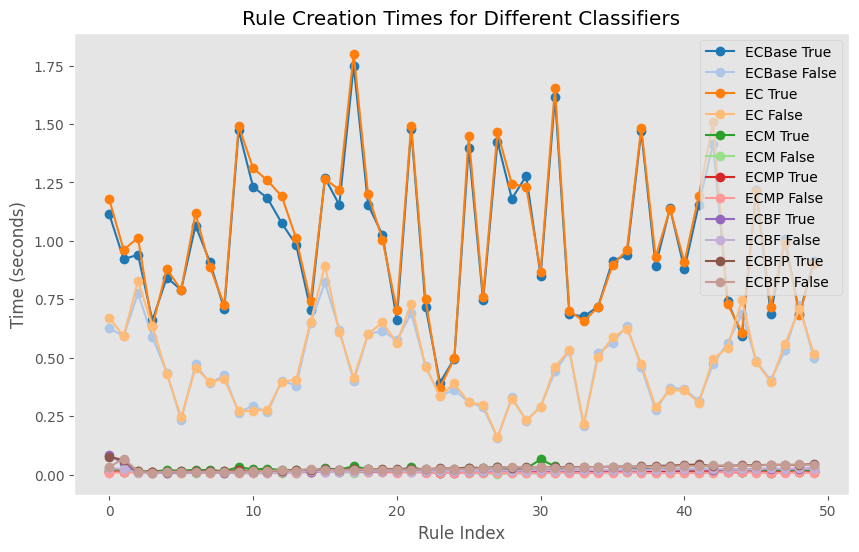

In [43]:
# plot the Rule creation times
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap('tab20').colors)
plt.figure(figsize=(10, 6))
plt.plot(ecbaseTrueTimes, label='ECBase True', marker='o')
plt.plot(ecbaseFalseTimes, label='ECBase False', marker='o')
plt.plot(ecTrueTimes, label='EC True', marker='o')
plt.plot(ecFalseTimes, label='EC False', marker='o')
plt.plot(ecmTrueTimes, label='ECM True', marker='o')
plt.plot(ecmFalseTimes, label='ECM False', marker='o')
plt.plot(ecmpTrueTimes, label='ECMP True', marker='o')
plt.plot(ecmpFalseTimes, label='ECMP False', marker='o')
plt.plot(ecbfTrueTimes, label='ECBF True', marker='o')
plt.plot(ecbfFalseTimes, label='ECBF False', marker='o')
plt.plot(ecbfpTrueTimes, label='ECBFP True', marker='o')
plt.plot(ecbfpFalseTimes, label='ECBFP False', marker='o')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Rule Creation Times for Different Classifiers')
plt.grid()
plt.show()

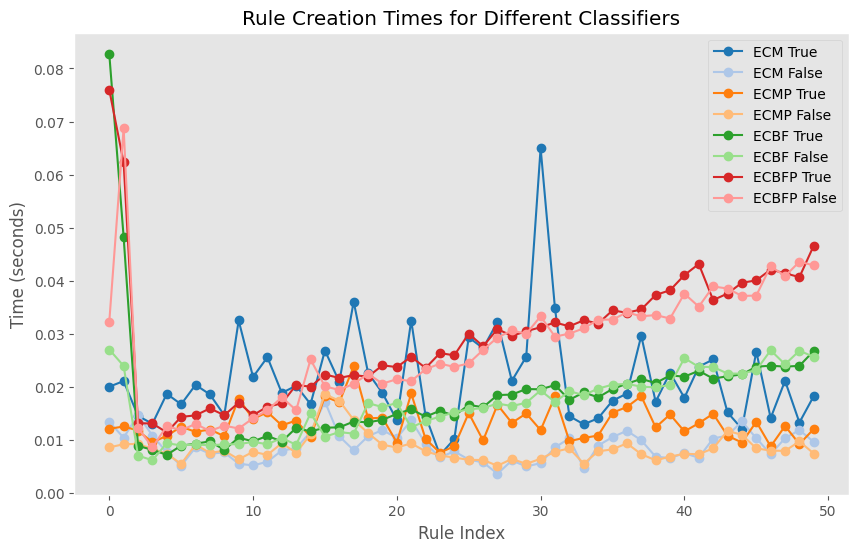

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTimes, label='ECM True', marker='o')
plt.plot(ecmFalseTimes, label='ECM False', marker='o')
plt.plot(ecmpTrueTimes, label='ECMP True', marker='o')
plt.plot(ecmpFalseTimes, label='ECMP False', marker='o')
plt.plot(ecbfTrueTimes, label='ECBF True', marker='o')
plt.plot(ecbfFalseTimes, label='ECBF False', marker='o')
plt.plot(ecbfpTrueTimes, label='ECBFP True', marker='o')
plt.plot(ecbfpFalseTimes, label='ECBFP False', marker='o')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Rule Creation Times for Different Classifiers')
plt.grid()
plt.show()

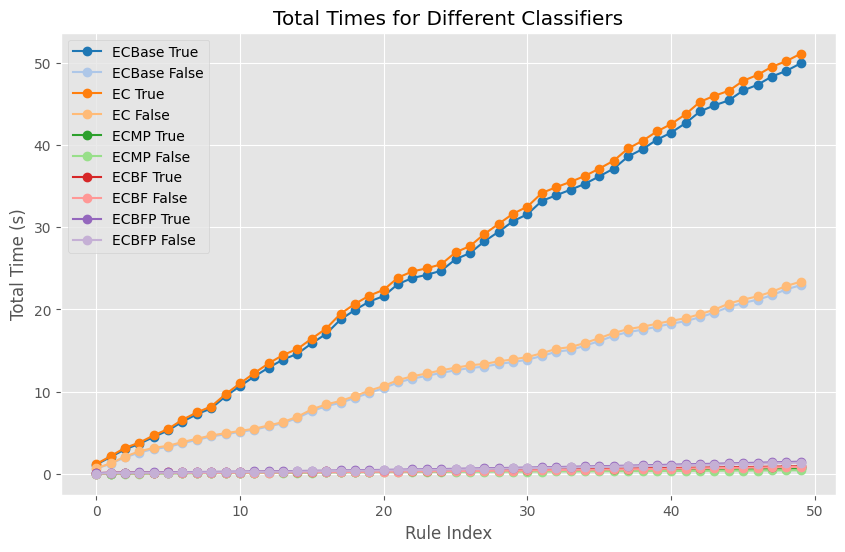

In [45]:
# same plot but for total times
plt.figure(figsize=(10, 6))
plt.plot(ecbaseTrueTotalTimes, label='ECBase True', marker='o')
plt.plot(ecbaseFalseTotalTimes, label='ECBase False', marker='o')
plt.plot(ecTrueTotalTimes, label='EC True', marker='o')
plt.plot(ecFalseTotalTimes, label='EC False', marker='o')
plt.plot(ecmpTrueTotalTimes, label='ECMP True', marker='o')
plt.plot(ecmpFalseTotalTimes, label='ECMP False', marker='o')
plt.plot(ecbfTrueTotalTimes, label='ECBF True', marker='o')
plt.plot(ecbfFalseTotalTimes, label='ECBF False', marker='o')
plt.plot(ecbfpTrueTotalTimes, label='ECBFP True', marker='o')
plt.plot(ecbfpFalseTotalTimes, label='ECBFP False', marker='o')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Total Times for Different Classifiers')
plt.show()

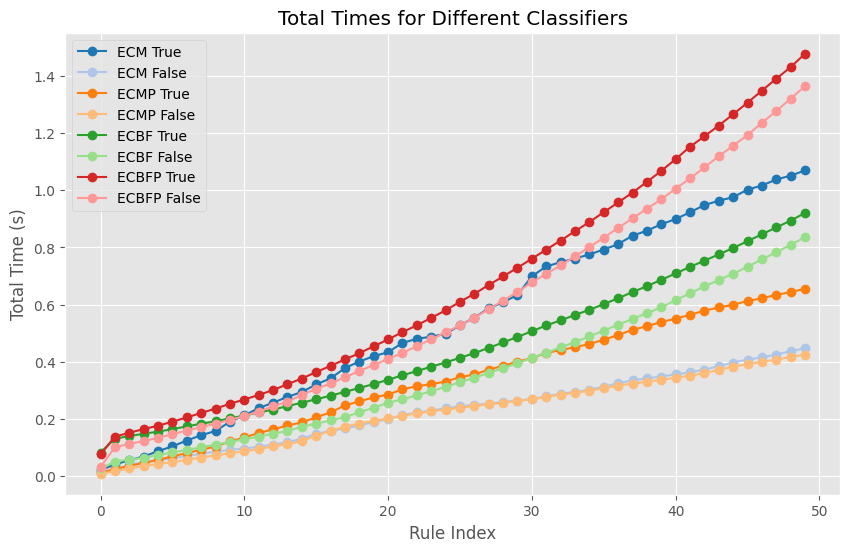

In [46]:
# same but without ecbase
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTotalTimes, label='ECM True', marker='o')
plt.plot(ecmFalseTotalTimes, label='ECM False', marker='o')
plt.plot(ecmpTrueTotalTimes, label='ECMP True', marker='o')
plt.plot(ecmpFalseTotalTimes, label='ECMP False', marker='o')
plt.plot(ecbfTrueTotalTimes, label='ECBF True', marker='o')
plt.plot(ecbfFalseTotalTimes, label='ECBF False', marker='o')
plt.plot(ecbfpTrueTotalTimes, label='ECBFP True', marker='o')
plt.plot(ecbfpFalseTotalTimes, label='ECBFP False', marker='o')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Total Times for Different Classifiers')
plt.show()